In [222]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import os 
import netCDF4 as nc
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1) Data Visualization

### Import raw data (export and import volumes)

In [223]:

rawData = pd.read_csv("./tradeData.csv") 
rawData

popData = pd.read_csv("./populationData.csv")
newData = rawData.merge(popData, right_on=['year', 'area'], left_on=['year', 'area'])
rawData = newData
display(rawData)



,domain,domainCode,areaCode,area,elementCode,element,itemCode,item,yearCode,year,unit_x,value,flag,flagDesc,area_code,unit_y,pop
0,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,112,Maize (corn),1961,1961,tonnes,NaN,NaN,NaN,4,1000 persons,8790.140
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,112,Maize (corn),1961,1961,1000 US$,NaN,NaN,NaN,4,1000 persons,8790.140
2,TCL,Crops and livestock products,4,Afghanistan,5910,Export Quantity,112,Maize (corn),1961,1961,tonnes,NaN,M,"Missing value (data cannot exist, not applicable)",4,1000 persons,8790.140
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,112,Maize (corn),1961,1961,1000 US$,NaN,M,"Missing value (data cannot exist, not applicable)",4,1000 persons,8790.140
4,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,111,Wheat,1961,1961,tonnes,32400.0,NaN,NaN,4,1000 persons,8790.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111818,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,141,Soya beans,2020,2020,1000 US$,317.0,NaN,NaN,716,1000 persons,15669.666
111819,TCL,Crops and livestock products,716,Zimbabwe,5610,Import Quantity,111,Wheat,2020,2020,tonnes,244249.0,NaN,NaN,716,1000 persons,15669.666
111820,TCL,Crops and livestock products,716,Zimbabwe,5622,Import Value,111,Wheat,2020,2020,1000 US$,102719.0,NaN,NaN,716,1000 persons,15669.666
111821,TCL,Crops and livestock products,716,Zimbabwe,5910,Export Quantity,111,Wheat,2020,2020,tonnes,2083.0,NaN,NaN,716,1000 persons,15669.666


# 2) Getting the data in and organized

In [224]:
print("How many years we have: ", len(np.unique(rawData['year'])))
print("How many countries we have: ", len(np.unique(rawData['area'])))
print("Our columns are : ")
for col in rawData.columns:
    print(col)

How many years we have:  60
How many countries we have:  203
Our columns are : 
domain
domainCode
areaCode
area
elementCode
element
itemCode
item
yearCode
year
unit_x
value
flag
flagDesc
area_code
unit_y
pop


### Visualizations

<AxesSubplot:title={'center':'Soy Exporters Rolling Mean'}, xlabel='year'>

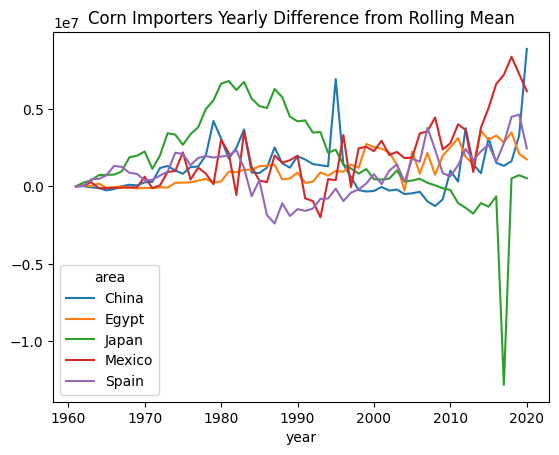

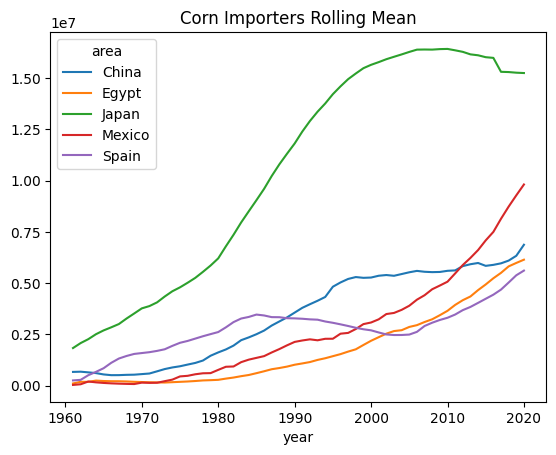

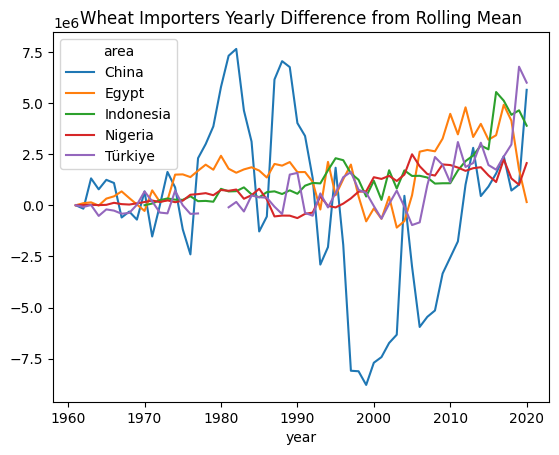

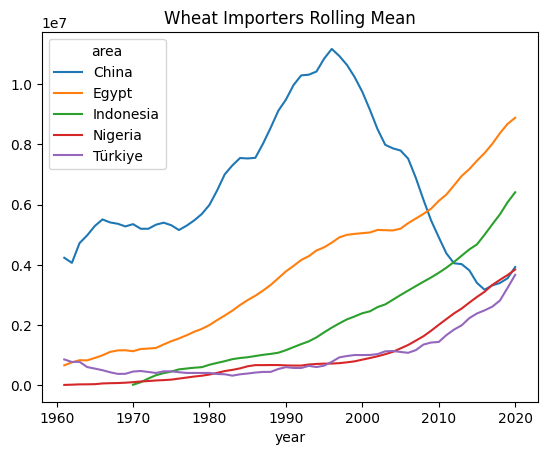

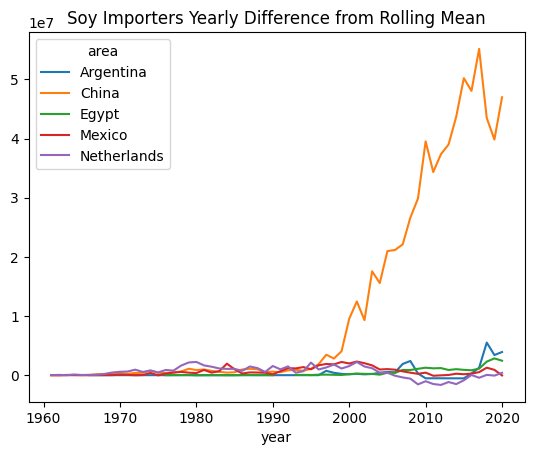

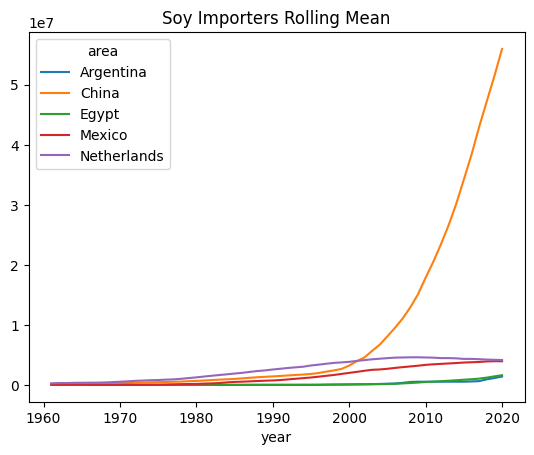

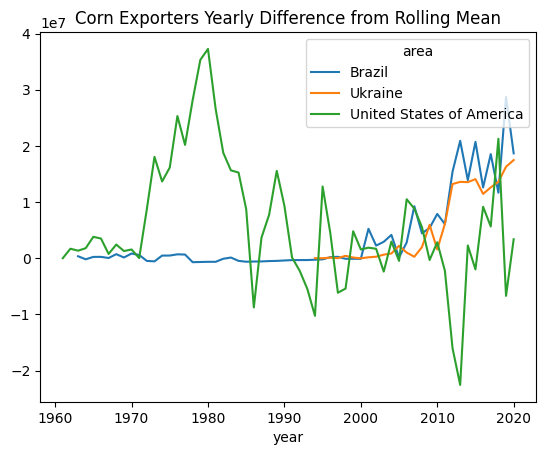

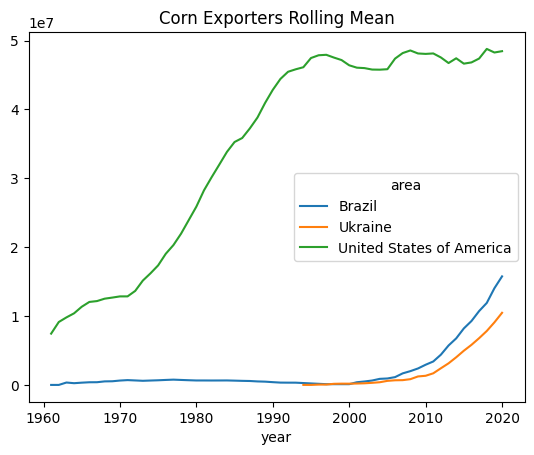

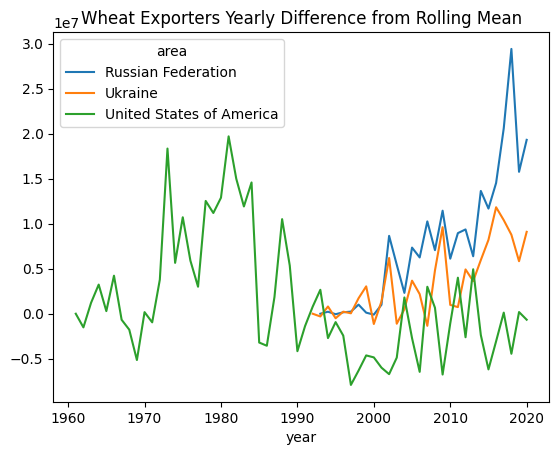

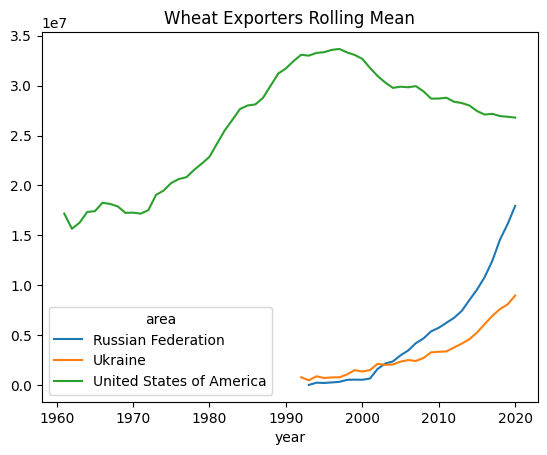

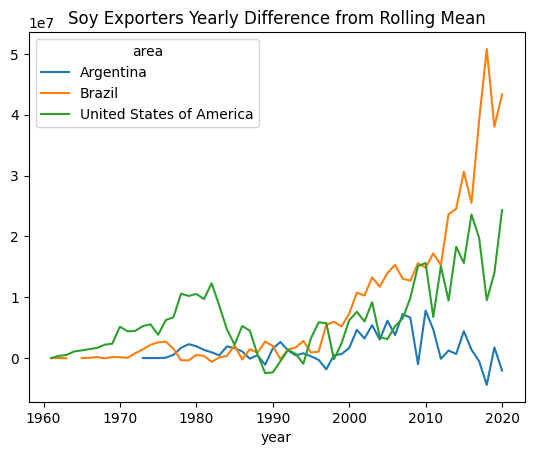

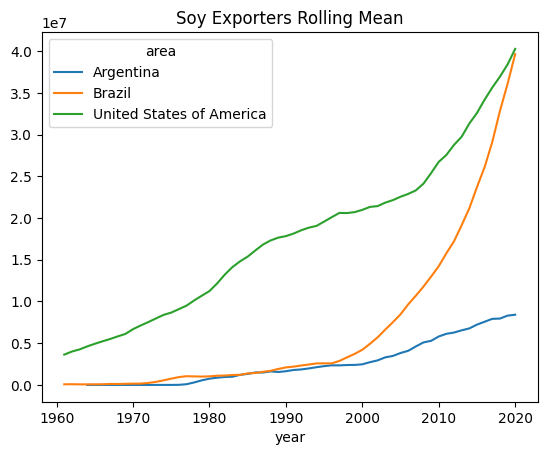

In [225]:
#groupedData = rawData.groupby('area' , 'item' , 'element')['value'].mean()
groupedData = rawData.groupby(['area', 'element', 'item'])['value']

# calculate a moving average for each group of grouped data, add these calculations as columns in original data
rawData['movAvg']= groupedData.transform(lambda x: x.rolling(20, 1).mean()) # 20 year rolling mean, could change this
rawData['diffFromAvg']= rawData['value'] - rawData['movAvg']
rawData['percentDiffFromAvg'] = rawData['diffFromAvg'] / rawData['movAvg']
rawData.to_csv("movingAverage.csv")

## START VISUALIZING BY ITEM / ELEMENT (i.e. Corn, Imports)
importQuantityData = rawData[(rawData["element"] == "Import Quantity")]
exportQuantityData = rawData[(rawData["element"] == "Export Quantity")]

## CORN IMPORTS

# take a segement of the data set--> corn import quantity
cornImports = importQuantityData[(importQuantityData["item"] == "Maize (corn)")]

#cornImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topCornImporters = cornImports[(cornImports['area'] == "Mexico") | (cornImports['area'] == "Egypt") | (cornImports['area'] == "China") | (cornImports['area'] == "Japan") | (cornImports['area'] == "Spain")]
topCornImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Corn Importers Yearly Difference from Rolling Mean")
topCornImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Corn Importers Rolling Mean")

## WHEAT IMPORTS

# take a segement of the data set--> Wheat import quantity
wheatImports = importQuantityData[(importQuantityData["item"] == "Wheat")]

#wheatImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topWheatImporters = wheatImports[(wheatImports['area'] == "China") | (wheatImports['area'] == "Indonesia") | (wheatImports['area'] == "Nigeria") | (wheatImports['area'] == "Egypt") | (wheatImports['area'] == "Türkiye")]
topWheatImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Wheat Importers Yearly Difference from Rolling Mean")
topWheatImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Wheat Importers Rolling Mean")

## SOY IMPORTS

# take a segement of the data set--> soy import quantity
soyImports = importQuantityData[(importQuantityData["item"] == "Soya beans")]

#soyImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topSoyImporters = soyImports[(soyImports['area'] == "China") | (soyImports['area'] == "Netherlands") | (soyImports['area'] == "Mexico") | (soyImports['area'] == "Egypt") | (soyImports['area'] == "Argentina")]
topSoyImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Soy Importers Yearly Difference from Rolling Mean")
topSoyImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Soy Importers Rolling Mean")

## CORN EXPORTS

# take a segement of the data set--> soy export quantity
cornExports = exportQuantityData[(exportQuantityData["item"] == "Maize (corn)")]

#cornImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topCornExports = cornExports[(cornExports['area'] == "United States of America") | (cornExports['area'] == "Brazil") | (cornExports['area'] == "Ukraine")]
topCornExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Corn Exporters Yearly Difference from Rolling Mean")
topCornExports.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Corn Exporters Rolling Mean")

## WHEAT EXPORTS

# take a segement of the data set--> soy export quantity
wheatExports = exportQuantityData[(exportQuantityData["item"] == "Wheat")]

#wheatImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topWheatExports = wheatExports[(wheatExports['area'] == "United States of America") | (wheatExports['area'] == "Russian Federation") | (wheatExports['area'] == "Ukraine")]
topWheatExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Wheat Exporters Yearly Difference from Rolling Mean")
topWheatExports.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Wheat Exporters Rolling Mean")

## SOY EXPORTS
# take a segement of the data set--> soy export quantity
soyExports = exportQuantityData[(exportQuantityData["item"] == "Soya beans")]

#soyExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

topSoyExports = soyExports[(soyExports['area'] == "United States of America") | (soyExports['area'] == "Brazil") | (soyExports['area'] == "Argentina")]
topSoyExports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Soy Exporters Yearly Difference from Rolling Mean")
topSoyExports.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Soy Exporters Rolling Mean")



# pd.pivot_table(cornImports.reset_index(),
#                index='year', columns='area', values='value'
#               ).plot(subplots=True, layout=(20,11))

# QUESTIONS with my moving average: 1) how to handle missing/zero values. Should I replace zeros? (2) I have a window of 10 right now... is that reasonable? Or is there a way to include all values to date? 



# Understanding the impacts of Export shocks on each country's imports
### What to do-> can we regress export anomalies for each commodity on each country's import anomalies and see which ones have the greatest correlation? 

In [226]:
# Code to regress a country's export anomaly on each country's import anomaly

## CORN ###

USCornExports = exportQuantityData[(exportQuantityData["area"] == "United States of America") & (exportQuantityData["item"] == "Maize (corn)")]
USCornExports["prevYearExp"] = USCornExports['diffFromAvg'].shift(+1)
USCornExports["percentPrevYearExp"] = USCornExports['percentDiffFromAvg'].shift(+1)


USCornExports['yearShift'] = (USCornExports['year'] + 1) # add column with year shift for matching later, we will regress with a one year lag

# create a dataset that links the US export variation to each import country's yearly data
cornEffectsData = cornImports.merge(USCornExports, right_on='year', left_on='year')
cornEffectsData.to_csv("cornEffects.csv")

# group this new data set by import country
groupedCorn = cornEffectsData.groupby('area_x')

# create a new dataframe to hold each country's sensitivity to US corn export changes
d = {'area': [], 'percentDiffFromAvg_y': [], 'year': [], 'percentPrevYearExp': [],'pop': [],'adj_r2': [], 'f_pvalue': [] }
regData = pd.DataFrame(data = d)

# for testing without running the whole loop
mex = groupedCorn.get_group("Japan")
lm = smf.ols('percentDiffFromAvg_x ~ percentDiffFromAvg_y + percentPrevYearExp +  year + pop_x', data = mex, missing='drop').fit()
print(lm.summary())
print(lm.params)
print(lm.rsquared_adj)
print(lm.f_pvalue)
predictions = lm.predict(mex)

display(predictions)
display(mex)
predictions.to_csv("predictions.csv")


# for g in groupedCorn.groups.keys():
#     try:
#         curr = groupedCorn.get_group(g)
#         lm = smf.ols('percentDiffFromAvg_x ~ percentDiffFromAvg_y + year + percentPrevYearExp + pop_x', data = curr, missing='drop').fit()
#         lm.summary()

#         regData.loc[len(regData.index)] = [g, lm.params['percentDiffFromAvg_y'], lm.params['year'], lm.params['percentPrevYearExp'], lm.params['pop_x'],lm.rsquared_adj, lm.f_pvalue] # add regression results for each country


#         # 1) pull out coefficients on diffFromAvg_y and year, create a row in a new dataset for country and coefficients
#         # 2) repeat with a 1 year lag between exports and imports
#         # 3) expand to other commodities and global produciton values

#     except:
#         print("Regression failed for country: " + str(g))

# display(regData)
# regData.to_csv('cornRegression.csv')

# other option is using fixed effects by country but seems less meaningful
# lm = smf.ols('diffFromAvg_x ~ diffFromAvg_y + year + C(area_x)', data = cornEffectsData, missing='drop').fit()
# lm.summary()






/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/407904551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USCornExports["prevYearExp"] = USCornExports['diffFromAvg'].shift(+1)
/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/407904551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USCornExports["percentPrevYearExp"] = USCornExports['percentDiffFromAvg'].shift(+1)
/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/407904551.py:10: SettingWithCopyWarning: 


                             OLS Regression Results                             
Dep. Variable:     percentDiffFromAvg_x   R-squared:                       0.293
Model:                              OLS   Adj. R-squared:                  0.241
Method:                   Least Squares   F-statistic:                     5.593
Date:                  Mon, 21 Nov 2022   Prob (F-statistic):           0.000767
Time:                          10:31:07   Log-Likelihood:                -89.342
No. Observations:                    59   AIC:                             188.7
Df Residuals:                        54   BIC:                             199.1
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

100           NaN
269      0.099162
438      0.151713
607      0.190886
776      0.447503
945      0.492280
1114     0.178671
1283     0.250420
1452     0.211409
1621     0.204138
1790     0.070888
1959     0.879006
2128     1.974853
2297     1.816835
2466     1.761678
2635     2.358166
2804     2.134237
2973     2.356305
3142     2.783539
3311     2.852012
3480     2.179720
3649     1.502703
3818     1.170299
3987     1.065206
4156     0.789995
4325     0.038388
4494     0.253728
4663     0.591183
4832     0.906058
5001     0.801665
5170     0.441757
5350     0.272101
5538     0.165144
5727     0.004189
5916     0.624049
6105     0.668258
6294     0.291170
6483     0.206955
6672     0.520198
6862     0.560096
7052     0.549642
7242     0.564262
7432     0.459595
7622     0.585552
7812     0.563799
8002     0.852399
8193     0.942339
8384     0.846598
8575     0.665852
8766     0.706445
8957     0.614977
9148     0.184142
9340    -0.150651
9533     0.501058
9729     0.680890
9922     0

,domain_x,domainCode_x,areaCode_x,area_x,elementCode_x,element_x,itemCode_x,item_x,yearCode_x,year,...,flagDesc_y,area_code_y,unit_y_y,pop_y,movAvg_y,diffFromAvg_y,percentDiffFromAvg_y,prevYearExp,percentPrevYearExp,yearShift
100,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1961,1961,...,NaN,840,1000 persons,179087.278,7.452500e+06,0.000000e+00,0.000000,NaN,NaN,1962
269,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1962,1962,...,NaN,840,1000 persons,181917.809,9.140450e+06,1.687950e+06,0.184668,0.000000e+00,0.000000,1963
438,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1963,1963,...,NaN,840,1000 persons,184649.873,9.808800e+06,1.336700e+06,0.136276,1.687950e+06,0.184668,1964
607,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1964,1964,...,NaN,840,1000 persons,187277.378,1.040225e+07,1.780350e+06,0.171150,1.336700e+06,0.136276,1965
776,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1965,1965,...,NaN,840,1000 persons,189703.283,1.135356e+07,3.805256e+06,0.335160,1.780350e+06,0.171150,1966
945,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1966,1966,...,NaN,840,1000 persons,191830.975,1.205347e+07,3.499547e+06,0.290335,3.805256e+06,0.335160,1967
1114,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1967,1967,...,NaN,840,1000 persons,193782.438,1.217959e+07,7.567223e+05,0.062130,3.499547e+06,0.290335,1968
1283,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1968,1968,...,NaN,840,1000 persons,195743.427,1.252701e+07,2.431917e+06,0.194134,7.567223e+05,0.062130,1969
1452,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1969,1969,...,NaN,840,1000 persons,197859.329,1.268634e+07,1.274651e+06,0.100474,2.431917e+06,0.194134,1970
1621,TCL,Crops and livestock products,484,Mexico,5610,Import Quantity,112,Maize (corn),1970,1970,...,NaN,840,1000 persons,200328.340,1.285858e+07,1.550140e+06,0.120553,1.274651e+06,0.100474,1971


In [227]:
# MEXICO price predictions

# mexCornPrices = pd.read_csv("MexicanCornPrices.csv")
# mexCornPrices['movAvg']= mexCornPrices['avg_price'].transform(lambda x: x.rolling(3, 1).mean()) # 3 year rolling mean, could change this
# mexCornPrices['diffFromAvg']= mexCornPrices['avg_price'] - mexCornPrices['movAvg']
# mexCornPrices['percentDiffFromAvg']= mexCornPrices['diffFromAvg'] / mexCornPrices['movAvg']
# mexCornPrices.to_csv("mexCornPrices.csv")

# mexPriceImp = mexCornPrices.merge(mex, right_on="year", left_on="year")
# display(mexPriceImp)
# mexPriceImp.to_csv("mexPriceImp.csv")

# lm = smf.ols('percentDiffFromAvg ~ percentDiffFromAvg_x + percentDiffFromAvg_y + percentPrevYearExp +  year + pop_y', data = mexPriceImp, missing='drop').fit()
# print(lm.summary())
# print(lm.params)
# print(lm.rsquared_adj)
# print(lm.f_pvalue)

# pricePred = lm.predict(mexPriceImp)
# display(pricePred)
# pricePred.to_csv("mexPricePred.csv")

mexCornPrices = pd.read_csv("japcpi.csv")
mexCornPrices['movAvg']= mexCornPrices['jap_cpi'].transform(lambda x: x.rolling(3, 1).mean()) # 3 year rolling mean, could change this
mexCornPrices['diffFromAvg']= mexCornPrices['jap_cpi'] - mexCornPrices['movAvg']
mexCornPrices['percentDiffFromAvg']= mexCornPrices['diffFromAvg'] / mexCornPrices['movAvg']
mexCornPrices.to_csv("mexCornPrices.csv")

mexPriceImp = mexCornPrices.merge(mex, right_on="year", left_on="year")
display(mexPriceImp)
mexPriceImp.to_csv("japPriceImp.csv")

lm = smf.ols('percentDiffFromAvg ~ percentDiffFromAvg_x + percentDiffFromAvg_y + percentPrevYearExp +  year + pop_y', data = mexPriceImp, missing='drop').fit()
print(lm.summary())
print(lm.params)
print(lm.rsquared_adj)
print(lm.f_pvalue)

pricePred = lm.predict(mexPriceImp)
display(pricePred)
pricePred.to_csv("japPricePred.csv")


,mex_cpi,year,movAvg,diffFromAvg,percentDiffFromAvg,domain_x,domainCode_x,areaCode_x,area_x,elementCode_x,...,flagDesc_y,area_code_y,unit_y_y,pop_y,movAvg_y,diffFromAvg_y,percentDiffFromAvg_y,prevYearExp,percentPrevYearExp,yearShift
0,44.303526,2000,44.303526,0.000000,0.000000,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,282398.554,46416125.45,1554664.55,0.033494,4799943.85,0.101747,2001
1,46.546752,2001,45.425139,1.121613,0.024691,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,285470.493,46070515.95,1873246.05,0.040660,1554664.55,0.033494,2002
2,48.293583,2002,46.381287,1.912296,0.041230,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,288350.252,46007685.40,1678135.60,0.036475,1873246.05,0.040660,2003
3,50.966489,2003,48.602275,2.364214,0.048644,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,291109.820,45796815.45,-2385062.45,-0.052079,1678135.60,0.036475,2004
4,54.644646,2004,51.301573,3.343073,0.065165,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,293947.885,45779614.85,2961573.15,0.064692,-2385062.45,-0.052079,2005
5,57.576969,2005,54.396035,3.180934,0.058477,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,296842.670,45847259.30,-478018.30,-0.010426,2961573.15,0.064692,2006
6,59.682718,2006,57.301444,2.381274,0.041557,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,299753.098,47387185.60,10496876.40,0.221513,-478018.30,-0.010426,2007
7,63.634255,2007,60.297981,3.336274,0.055330,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,302743.399,48192629.00,8821791.00,0.183053,10496876.40,0.221513,2008
8,68.820343,2008,64.045772,4.774571,0.074549,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,305694.910,48568945.65,5525451.35,0.113765,8821791.00,0.183053,2009
9,74.889263,2009,69.114620,5.774642,0.083552,TCL,Crops and livestock products,484,Mexico,5610,...,NaN,840,1000 persons,308512.035,48133949.25,-320549.25,-0.006660,5525451.35,0.113765,2010


                            OLS Regression Results                            
Dep. Variable:     percentDiffFromAvg   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     2.150
Date:                Mon, 21 Nov 2022   Prob (F-statistic):              0.115
Time:                        10:31:07   Log-Likelihood:                 61.241
No. Observations:                  21   AIC:                            -110.5
Df Residuals:                      15   BIC:                            -104.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               52.7303 

0     0.028827
1     0.021717
2     0.043847
3     0.039856
4     0.050676
5     0.056074
6     0.043775
7     0.054322
8     0.046388
9     0.069575
10    0.064811
11    0.053780
12    0.050324
13    0.065684
14    0.052438
15    0.057276
16    0.051600
17    0.056014
18    0.055884
19    0.054288
20    0.041312
dtype: float64

/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/

Regression failed for country: Cook Islands
Regression failed for country: Guinea-Bissau


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/elenahorton/Library/Python/3.8/lib/python/site-p

Regression failed for country: Saint Kitts and Nevis
Regression failed for country: Sao Tome and Principe


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/sit

Regression failed for country: Tuvalu


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/e

Regression failed for country: Central African Republic
Regression failed for country: Comoros
Regression failed for country: Djibouti
Regression failed for country: Eritrea


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/elenahorton/Library/Python/3.8/lib/python/site-p

Regression failed for country: Guinea-Bissau


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/st

Regression failed for country: Nauru
Regression failed for country: Samoa


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constan

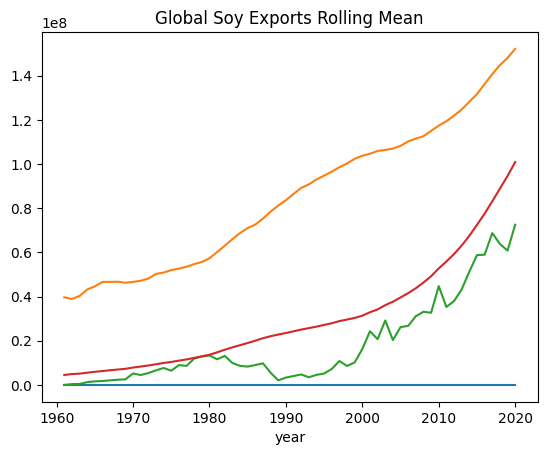

In [228]:
## WHEAT

totalWheatExports = pd.read_csv('totalWheatExports.csv')

totalWheatExports['movAvg']= totalWheatExports['wheat_exp_total'].transform(lambda x: x.rolling(20, 1).mean()) # 10 year rolling mean, could change this
totalWheatExports['diffFromAvg']= totalWheatExports['wheat_exp_total'] - totalWheatExports['movAvg']
totalWheatExports['percentDiffFromAvg']= totalWheatExports['diffFromAvg'] / totalWheatExports['movAvg']
totalWheatExports.to_csv("movAvgWheat.csv")

totalWheatExports.groupby(['year'])['percentDiffFromAvg'].mean().plot(title="Global Wheat Exports Yearly Difference from Rolling Mean")
totalWheatExports.groupby(['year'])['movAvg'].mean().plot(title="Global Wheat Exports Rolling Mean")

totalWheatExports["prevYearExp"] = totalWheatExports['diffFromAvg'].shift(+1)
totalWheatExports["percentPrevYearExp"] = totalWheatExports['percentDiffFromAvg'].shift(+1)


wheatEffectsData = wheatImports.merge(totalWheatExports, right_on='year', left_on='year')
wheatEffectsData.to_csv('wheatEffects.csv')

groupedWheat = wheatEffectsData.groupby('area')


# create a new dataframe to hold each country's sensitivity to US corn export changes
d = {'area': [], 'percentDiffFromAvg_y': [], 'year': [], 'percentPrevYearExp': [], 'pop': [], 'adj_r2': [], 'f_pvalue': [] }
wheatRegData = pd.DataFrame(data = d)

for g in groupedWheat.groups.keys():
    try:
        curr = groupedWheat.get_group(g)
        lm = smf.ols('percentDiffFromAvg_x ~ percentDiffFromAvg_y + year + percentPrevYearExp + pop', data = curr, missing='drop').fit()
        lm.summary()

        wheatRegData.loc[len(wheatRegData.index)] = [g, lm.params['percentDiffFromAvg_y'], lm.params['year'], lm.params['percentPrevYearExp'], lm.params['pop'],lm.rsquared_adj, lm.f_pvalue] # add regression results for each country


        # 1) pull out coefficients on diffFromAvg_y and year, create a row in a new dataset for country and coefficients
        # 2) repeat with a 1 year lag between exports and imports
        # 3) expand to other commodities and global produciton values

    except:
        print("Regression failed for country: " + str(g))

wheatRegData.to_csv('wheatRegression.csv')


## SOYBEANS


totalSoyExports = pd.read_csv('totalSoyExports.csv')

totalSoyExports['movAvg']= totalSoyExports['soy_exp_total'].transform(lambda x: x.rolling(20, 1).mean()) # 10 year rolling mean, could change this
totalSoyExports['diffFromAvg']= totalSoyExports['soy_exp_total'] - totalSoyExports['movAvg']
totalSoyExports['percentDiffFromAvg']= totalSoyExports['diffFromAvg'] / totalSoyExports['movAvg']
totalSoyExports.to_csv("movAvgSoy.csv")

totalSoyExports.groupby(['year'])['diffFromAvg'].mean().plot(title="Global Soy Exports Yearly Difference from Rolling Mean")
totalSoyExports.groupby(['year'])['movAvg'].mean().plot(title="Global Soy Exports Rolling Mean")

totalSoyExports["prevYearExp"] = totalSoyExports['diffFromAvg'].shift(+1)
totalSoyExports["percentPrevYearExp"] = totalSoyExports['percentDiffFromAvg'].shift(+1)

soyEffectsData = soyImports.merge(totalSoyExports, right_on='year', left_on='year')
soyEffectsData.to_csv('soyEffects.csv')

groupedSoy = soyEffectsData.groupby('area')


# create a new dataframe to hold each country's sensitivity to global wheat export changes
d = {'area': [], 'percentDiffFromAvg_y': [], 'year': [], 'percentPrevYearExp': [], 'pop': [],'adj_r2': [], 'f_pvalue': [] }
soyRegData = pd.DataFrame(data = d)

for g in groupedSoy.groups.keys():
    try:
        curr = groupedSoy.get_group(g)
        lm = smf.ols('percentDiffFromAvg_x ~ percentDiffFromAvg_y + percentPrevYearExp + year + pop', data = curr, missing='drop').fit()
        lm.summary()

        soyRegData.loc[len(soyRegData.index)] = [g, lm.params['percentDiffFromAvg_y'], lm.params['year'],lm.params['percentPrevYearExp'], lm.params['pop'], lm.rsquared_adj, lm.f_pvalue] # add regression results for each country


        # 1) pull out coefficients on diffFromAvg_y and year, create a row in a new dataset for country and coefficients
        # 2) repeat with a 1 year lag between exports and imports
        # 3) expand to other commodities and global produciton values

    except:
        print("Regression failed for country: " + str(g))

soyRegData.to_csv('soyRegression.csv')




# year export anomaly inclusion
# shift to % based values for export anomaly
# look into trade relationships
# is the sensitivity of nations to export anomalies changing over time?
# let's look at context and if it makes sense, particuarly for big events driving the relationship
# plotting relationships for countries that seem to have them
# imports and predicted imports from the model
# population



In [229]:
## US WHEAT ###

USWheatExports = exportQuantityData[(exportQuantityData["area"] == "United States of America") & (exportQuantityData["item"] == "Wheat") & (exportQuantityData["year"] >= 2000)]
USWheatExports["prevYearExp"] = USWheatExports['diffFromAvg'].shift(+1)
USWheatExports["percentPrevYearExp"] = USWheatExports['percentDiffFromAvg'].shift(+1)


USWheatExports['yearShift'] = (USWheatExports['year'] + 1) # add column with year shift for matching later, we will regress with a one year lag

# create a dataset that links the US export variation to each import country's yearly data
USWheatEffectsData = wheatImports.merge(USWheatExports, right_on='year', left_on='year')
USWheatEffectsData.to_csv("USWheatEffects.csv")
display(USWheatEffectsData)

# group this new data set by import country
groupedWheat = USWheatEffectsData.groupby('area_x')

# create a new dataframe to hold each country's sensitivity to US corn export changes
d = {'area': [], 'percentDiffFromAvg_y': [], 'year': [], 'percentPrevYearExp': [],'pop': [],'adj_r2': [], 'f_pvalue': [] }
regData = pd.DataFrame(data = d)

# # for testing without running the whole loop
# afg = groupedCorn.get_group("Afghanistan")
# lm = smf.ols('diffFromAvg_x ~ diffFromAvg_y + year + pop_y', data = afg, missing='drop').fit()
# print(lm.summary())
# print(lm.params)
# print(lm.rsquared_adj)
# print(lm.f_pvalue)


for g in groupedWheat.groups.keys():
    try:
        curr = groupedWheat.get_group(g)
        lm = smf.ols('percentDiffFromAvg_x ~ percentDiffFromAvg_y + year + percentPrevYearExp + pop_x', data = curr, missing='drop').fit()
        lm.summary()

        regData.loc[len(regData.index)] = [g, lm.params['percentDiffFromAvg_y'], lm.params['year'], lm.params['percentPrevYearExp'], lm.params['pop_x'],lm.rsquared_adj, lm.f_pvalue] # add regression results for each country


        # 1) pull out coefficients on diffFromAvg_y and year, create a row in a new dataset for country and coefficients
        # 2) repeat with a 1 year lag between exports and imports
        # 3) expand to other commodities and global produciton values

    except:
        print("Regression failed for country: " + str(g))

display(regData)
regData.to_csv('USWheatRegression.csv')

/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/498172729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USWheatExports["prevYearExp"] = USWheatExports['diffFromAvg'].shift(+1)
/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/498172729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USWheatExports["percentPrevYearExp"] = USWheatExports['percentDiffFromAvg'].shift(+1)
/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/498172729.py:8: SettingWithCopyWarning

,domain_x,domainCode_x,areaCode_x,area_x,elementCode_x,element_x,itemCode_x,item_x,yearCode_x,year,...,flagDesc_y,area_code_y,unit_y_y,pop_y,movAvg_y,diffFromAvg_y,percentDiffFromAvg_y,prevYearExp,percentPrevYearExp,yearShift
0,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,111,Wheat,2000,2000,...,NaN,840,1000 persons,282398.554,32680654.1,-4850504.1,-0.148421,NaN,NaN,2001
1,TCL,Crops and livestock products,8,Albania,5610,Import Quantity,111,Wheat,2000,2000,...,NaN,840,1000 persons,282398.554,32680654.1,-4850504.1,-0.148421,NaN,NaN,2001
2,TCL,Crops and livestock products,12,Algeria,5610,Import Quantity,111,Wheat,2000,2000,...,NaN,840,1000 persons,282398.554,32680654.1,-4850504.1,-0.148421,NaN,NaN,2001
3,TCL,Crops and livestock products,24,Angola,5610,Import Quantity,111,Wheat,2000,2000,...,NaN,840,1000 persons,282398.554,32680654.1,-4850504.1,-0.148421,NaN,NaN,2001
4,TCL,Crops and livestock products,28,Antigua and Barbuda,5610,Import Quantity,111,Wheat,2000,2000,...,NaN,840,1000 persons,282398.554,32680654.1,-4850504.1,-0.148421,NaN,NaN,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,TCL,Crops and livestock products,862,Venezuela (Bolivarian Republic of),5610,Import Quantity,111,Wheat,2020,2020,...,NaN,840,1000 persons,335942.003,26795951.6,-664325.6,-0.024792,187729.2,0.006984,2021
3924,TCL,Crops and livestock products,704,Viet Nam,5610,Import Quantity,111,Wheat,2020,2020,...,NaN,840,1000 persons,335942.003,26795951.6,-664325.6,-0.024792,187729.2,0.006984,2021
3925,TCL,Crops and livestock products,887,Yemen,5610,Import Quantity,111,Wheat,2020,2020,...,NaN,840,1000 persons,335942.003,26795951.6,-664325.6,-0.024792,187729.2,0.006984,2021
3926,TCL,Crops and livestock products,894,Zambia,5610,Import Quantity,111,Wheat,2020,2020,...,NaN,840,1000 persons,335942.003,26795951.6,-664325.6,-0.024792,187729.2,0.006984,2021


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library

Regression failed for country: Comoros
Regression failed for country: Cook Islands


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/elenahorton/Library/Python/3.8/lib/python/site-p

Regression failed for country: Guinea-Bissau
Regression failed for country: Kiribati


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library

Regression failed for country: Nauru
Regression failed for country: Saint Kitts and Nevis


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library

Regression failed for country: Sao Tome and Principe
Regression failed for country: Tuvalu


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/

,area,percentDiffFromAvg_y,year,percentPrevYearExp,pop,adj_r2,f_pvalue
0,Afghanistan,-1.885902,0.730680,-0.287228,-0.000794,0.058630,3.158821e-01
1,Albania,0.576928,-0.047805,0.166783,0.001342,0.762804,2.479266e-05
2,Algeria,-0.233919,-0.046241,0.326303,0.000044,0.180617,1.390866e-01
3,Angola,3.612627,-3.288117,1.612724,0.004053,0.602549,1.574321e-03
4,Antigua and Barbuda,7.619945,1.587446,18.686671,-1.745131,0.867959,2.416134e-01
...,...,...,...,...,...,...,...
184,Venezuela (Bolivarian Republic of),0.548773,-0.087724,0.227289,0.000206,0.874991,2.222978e-07
185,Viet Nam,-1.064914,-1.565090,-1.764552,0.001621,0.628153,6.411893e-04
186,Yemen,-0.273457,0.401073,0.473733,-0.000609,0.572215,1.737736e-03
187,Zambia,-0.169010,-0.838277,0.289289,0.001687,0.182663,1.369568e-01


In [230]:
## US SOY ###

USSoyExports = exportQuantityData[(exportQuantityData["area"] == "United States of America") & (exportQuantityData["item"] == "Soya beans")]
USSoyExports["prevYearExp"] = USSoyExports['diffFromAvg'].shift(+1)
USSoyExports["percentPrevYearExp"] = USSoyExports['percentDiffFromAvg'].shift(+1)


USSoyExports['yearShift'] = (USSoyExports['year'] + 1) # add column with year shift for matching later, we will regress with a one year lag

# create a dataset that links the US export variation to each import country's yearly data
USSoyEffectsData = soyImports.merge(USSoyExports, right_on='year', left_on='year')
USSoyEffectsData.to_csv("USSoyEffects.csv")

# group this new data set by import country
groupedSoy = USSoyEffectsData.groupby('area_x')

# create a new dataframe to hold each country's sensitivity to US corn export changes
d = {'area': [], 'percentDiffFromAvg_y': [], 'year': [], 'percentPrevYearExp': [],'pop': [],'adj_r2': [], 'f_pvalue': [] }
regData = pd.DataFrame(data = d)

# # for testing without running the whole loop
# afg = groupedCorn.get_group("Afghanistan")
# lm = smf.ols('diffFromAvg_x ~ diffFromAvg_y + year + pop_y', data = afg, missing='drop').fit()
# print(lm.summary())
# print(lm.params)
# print(lm.rsquared_adj)
# print(lm.f_pvalue)


for g in groupedSoy.groups.keys():
    try:
        curr = groupedSoy.get_group(g)
        lm = smf.ols('percentDiffFromAvg_x ~ percentDiffFromAvg_y + year + percentPrevYearExp + pop_x', data = curr, missing='drop').fit()
        lm.summary()

        regData.loc[len(regData.index)] = [g, lm.params['percentDiffFromAvg_y'], lm.params['year'], lm.params['percentPrevYearExp'], lm.params['pop_x'],lm.rsquared_adj, lm.f_pvalue] # add regression results for each country


        # 1) pull out coefficients on diffFromAvg_y and year, create a row in a new dataset for country and coefficients
        # 2) repeat with a 1 year lag between exports and imports
        # 3) expand to other commodities and global produciton values

    except:
        print("Regression failed for country: " + str(g))

display(regData)
regData.to_csv('USSoyRegression.csv')

/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/1655939333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USSoyExports["prevYearExp"] = USSoyExports['diffFromAvg'].shift(+1)
/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/1655939333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USSoyExports["percentPrevYearExp"] = USSoyExports['percentDiffFromAvg'].shift(+1)
/var/folders/nc/9vf4mzmx5vq23n_tf01mnjjh0000gn/T/ipykernel_9760/1655939333.py:8: SettingWithCopyWarning: 
A 

Regression failed for country: Central African Republic
Regression failed for country: Comoros
Regression failed for country: Djibouti
Regression failed for country: Eritrea


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/elenahorton/Library/Python/3.8/lib/python/site-p

Regression failed for country: Guinea-Bissau


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Regression failed for country: Nauru


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constan

Regression failed for country: Samoa


/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3.8/lib/python/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/elenahorton/Library/Python/3

,area,percentDiffFromAvg_y,year,percentPrevYearExp,pop,adj_r2,f_pvalue
0,Afghanistan,-2.901232,-4.737147,5.507540,0.004990,-0.063410,0.642720
1,Albania,-2.178291,0.098594,4.067201,0.005507,-0.079411,0.576151
2,Algeria,0.785801,-1.951763,-1.201862,0.003503,0.275155,0.032069
3,Angola,-1.161881,-0.106809,-1.108137,0.000251,0.252598,0.060865
4,Antigua and Barbuda,-0.006493,0.005783,-0.002341,-0.143371,NaN,NaN
...,...,...,...,...,...,...,...
188,Viet Nam,0.736208,0.308037,0.418766,-0.000219,0.317803,0.002439
189,Yemen,-0.805792,-0.222964,-2.528782,0.000239,0.564238,0.000294
190,Yugoslav SFR,2.722601,0.571654,2.165405,-0.003680,0.402389,0.008945
191,Zambia,1.646719,0.231827,-0.909230,-0.000811,0.076402,0.169879


In [231]:
# ## HAVEN'T STARTED WORKING ON THIS YET! JUST A BUNCH OF SCRATCH CODE
# # REGRESSION ATTEMPTS-- what I need to do--> create a dataset for each commodity with major exporters/importers by country. 
# # Can we predict import country X's diffFromAvg based on export country Y's diff from avg? 

# # Steps: 1) Create the data set (how to arrange by country?)

# ## START VISUALIZING BY ITEM / ELEMENT (i.e. Corn, Imports)
# importQuantityData = rawData[(rawData["element"] == "Import Quantity")]
# exportQuantityData = rawData[(rawData["element"] == "Export Quantity")]

# ## CORN IMPORTS

# # take a segement of the data set--> corn import quantity
# cornImports = importQuantityData[(importQuantityData["item"] == "Maize (corn)")]

# #cornImports.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot()

# topCornImporters = cornImports[(cornImports['area'] == "Mexico") | (cornImports['area'] == "Egypt") | (cornImports['area'] == "China") | (cornImports['area'] == "Japan") | (cornImports['area'] == "Spain")]
# topCornImporters.groupby(['year', 'area'])['diffFromAvg'].mean().unstack().plot(title="Corn Importers Yearly Difference from Rolling Mean")
# topCornImporters.groupby(['year', 'area'])['movAvg'].mean().unstack().plot(title="Corn Importers Rolling Mean")

# ## WHEAT IMPORTS

# lm = smf.ols('diffFromAvg ~ year + element ', data = rawData).fit()
# lm.summary()